# 1. File exploration

# 1.1. Driver file

In [1]:

#importing libraries

import pandas as pd
import numpy as np

In [2]:
#importing driver id file

driverid=pd.read_csv("data/driver_ids.csv")

In [3]:
#check file

driverid.head(10)

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00
5,01788cf817698fe68eaecd7eb18b2f72,2016-05-06 00:00:00
6,0213f8b59219e32142711992ca4ec01f,2016-04-07 00:00:00
7,021e5cd15ef0bb3ec20a12af99e142b3,2016-05-07 00:00:00
8,0258e250ca195cc6258cbdc75aecd853,2016-04-26 00:00:00
9,028b5a4dcd7f4924ebfabcf2e814c014,2016-05-06 00:00:00


In [4]:
#check the types

driverid.dtypes

driver_id              object
driver_onboard_date    object
dtype: object

In [5]:
#check dataframe size

driverid.index

RangeIndex(start=0, stop=937, step=1)

In [6]:
#check nulls

driverid.isnull().value_counts()

driver_id  driver_onboard_date
False      False                  937
dtype: int64

In [7]:
#check if driver is unique


driverid['driver_id'].value_counts().sort_values(ascending=False)


028b5a4dcd7f4924ebfabcf2e814c014    1
3bfb185b9491beb56fc10b6212c6c9c2    1
c56b62b863a81370827e04d2c0a669a8    1
f17cfca756365f6863a241ea96ab9f75    1
9c0158ebe58592fdb3d18fb9c4623db7    1
                                   ..
e0e76adfaac64932530b49127890139c    1
06c848ab3a7fc5421e82e98850a81710    1
da020ae1ea6a8ce10cd43f5e36880c8d    1
25827d13d5d988125ef4cc8a2ea3ddc1    1
440abd26a1c60ce02351bf1823d2d46d    1
Name: driver_id, Length: 937, dtype: int64

In [8]:
#change to date time

driverid['driver_onboard_date']=pd.to_datetime(driverid['driver_onboard_date'],errors='coerce')

In [9]:
#confirm

driverid.dtypes

driver_id                      object
driver_onboard_date    datetime64[ns]
dtype: object

In [10]:
#check the year

driverid['driver_onboard_date'].dt.year.value_counts()

2016    937
Name: driver_onboard_date, dtype: int64

In [11]:
#check the month for seasonality

driverid['driver_onboard_date'].dt.month.value_counts()

4    591
5    239
3    107
Name: driver_onboard_date, dtype: int64

In [12]:
#check the day for seasonality

driverid['driver_onboard_date'].dt.day.value_counts()

29    57
5     56
4     50
6     50
12    45
30    44
13    42
11    41
28    38
7     36
14    36
9     34
8     32
31    30
15    29
1     27
10    25
21    24
26    23
20    22
2     22
19    21
22    21
23    20
3     18
17    17
25    17
18    16
27    16
16    15
24    13
Name: driver_onboard_date, dtype: int64

# 1.2. Rider id

In [13]:
#importing driver id file
riderid=pd.read_csv("data/ride_ids.csv")

In [14]:
#check file

riderid.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [15]:
#check the types

riderid.dtypes

driver_id          object
ride_id            object
ride_distance       int64
ride_duration       int64
ride_prime_time     int64
dtype: object

In [16]:
#check null values

def ridenulls(column):
    return riderid.loc[riderid[column].isnull()]
    

In [17]:
#call function

ridenulls('ride_prime_time')

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time


In [18]:
# distance is in meters and duration in seconds, needs conversion

In [19]:
#inser columns with the duration in minutes

riderid["ride_duration_min"]=riderid["ride_duration"]/60

In [20]:
# insert column with the conversion to miles
#1 mile = 1 609.344 meters

riderid["ride_distance_miles"]=riderid["ride_distance"]/1609.344



In [21]:
#inser columns with the duration in minutes

riderid["ride_primetime_min"]=riderid["ride_prime_time"]/60

In [22]:
#confirm

riderid.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,0.833333
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,0.000000
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,0.000000
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,0.416667
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,1.666667


In [23]:
#testing a result

test=riderid.loc[riderid['ride_id']=="00003037a262d9ee40e61b5c0718f7f0"]
test

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min
167241,d967f5296732fa55266b5f1314e7447b,00003037a262d9ee40e61b5c0718f7f0,3698,1112,0,18.533333,2.297831,0.0


In [24]:
#the duration is the time difference between picked_up_at and dropped_off_at



## 1.2.1. Adding rates

In [25]:
"""Base Fare $2.00
Cost per Mile $1.15
Cost per Minute $0.22
Service Fee $1.75
Minimum Fare $5.00
Maximum Fare $400.00"""

'Base Fare $2.00\nCost per Mile $1.15\nCost per Minute $0.22\nService Fee $1.75\nMinimum Fare $5.00\nMaximum Fare $400.00'

In [26]:
#add base fare

riderid["base_fare$"]=2

In [27]:
#add cost per mile

riderid["distance_ride_revenue$"]=riderid["ride_distance_miles"]*1.15

In [28]:
#add cost per minute

riderid["duration_ride_revenue$"]=riderid["ride_duration_min"]*0.22

In [29]:
#add service fee

riderid["service_fee$"]=1.75

In [30]:
# sum the ride value before the service fee, so base fare plus duration revenue plus distance revenue

riderid["driver_revenue_before_commission$"]=riderid["base_fare$"]+riderid["distance_ride_revenue$"]+riderid["duration_ride_revenue$"]

In [31]:
#confirm

riderid.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,0.833333,2,1.294099,1.199000,1.75,4.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,0.000000,2,2.402407,2.966333,1.75,7.368741
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,0.000000,2,2.345241,2.097333,1.75,6.442575
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,0.416667,2,46.649722,12.239333,1.75,60.889055
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,1.666667,2,2.940484,3.017667,1.75,7.958150


# 1.3. Rider Time stamps

In [32]:
#importing driver id file

ridertime=pd.read_csv("data/ride_timestamps.csv")

In [33]:
#check file

ridertime.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [34]:
# check types

ridertime.dtypes

ride_id      object
event        object
timestamp    object
dtype: object

In [35]:
#change timestamp to correct type

ridertime['timestamp']=pd.to_datetime(ridertime['timestamp'],errors='coerce')

In [36]:
# check types

ridertime.dtypes

ride_id              object
event                object
timestamp    datetime64[ns]
dtype: object

In [37]:
#add month

ridertime["month"]=ridertime["timestamp"].dt.month

In [38]:
# check variation

ridertime["month"].value_counts()

5.0    418294
6.0    346486
4.0    199384
3.0      6240
Name: month, dtype: int64

In [39]:
#add day

ridertime["day"]=ridertime["timestamp"].dt.day

In [40]:
# check variation

ridertime["day"].value_counts()

21.0    37040
25.0    36783
15.0    36674
14.0    36555
20.0    36346
26.0    36057
16.0    35572
24.0    35458
17.0    35308
22.0    35098
13.0    34828
23.0    34293
11.0    33543
19.0    32878
10.0    32777
18.0    32595
12.0    32518
7.0     31627
9.0     30766
6.0     30721
4.0     29479
5.0     28832
8.0     28702
3.0     28685
28.0    26637
27.0    26557
2.0     25821
29.0    25775
1.0     24408
30.0    24026
31.0    14045
Name: day, dtype: int64

In [41]:
#add weekday
# Monday=0, Sunday=6

ridertime["weekday"]=ridertime["timestamp"].dt.weekday

In [42]:
# check variation

ridertime["weekday"].value_counts()

4.0    170113
5.0    160010
3.0    149367
2.0    137032
1.0    125905
6.0    120157
0.0    107820
Name: weekday, dtype: int64

In [43]:
# weekdays more popular are 4 and 5, Friday and Saturday

In [44]:
#add hour

ridertime["hour"]=ridertime["timestamp"].dt.hour

In [45]:
# check variation

ridertime["hour"].value_counts()

19.0    70891
18.0    68947
20.0    64591
21.0    64444
22.0    60147
17.0    57222
23.0    48933
9.0     48835
16.0    48074
8.0     44248
10.0    43713
15.0    43087
11.0    41531
12.0    41165
14.0    40080
13.0    39577
0.0     34220
7.0     32742
1.0     24602
6.0     16653
2.0     15173
5.0      8174
3.0      7371
4.0      5984
Name: hour, dtype: int64

In [46]:
#night time more popular 

## 1.3.1: checking time between events

In [47]:
#creating a copy

timedif=ridertime.copy()

In [48]:
#most_recent_per_code = timedif.sort_values('timestamp').groupby(['ride_id'], as_index=False).last()


In [49]:
# driver pay includes time spent waiting, starting one minute after arrival is confirmed
# check difference arrived at and picked up at

waiting_time=timedif.groupby(['ride_id'], as_index=False).nth([2,3])

In [50]:
#check if right

waiting_time.head()

,ride_id,event,timestamp,month,day,weekday,hour
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,6.0,13.0,0.0,9.0
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,6.0,13.0,0.0,9.0
7,00005eae40882760d675da5effb89ae3,arrived_at,2016-05-14 05:26:17,5.0,14.0,5.0,5.0
8,00005eae40882760d675da5effb89ae3,picked_up_at,2016-05-14 05:26:18,5.0,14.0,5.0,5.0
12,000061d42cf29f73b591041d9a1b2973,arrived_at,2016-05-16 15:47:29,5.0,16.0,0.0,15.0


In [51]:
#check time difference between requested and dropped of

waiting_time2=waiting_time.groupby(['ride_id'], as_index=False).timestamp.diff()

In [52]:
# introduce the ride id again

waiting_time2['rideid']=waiting_time['ride_id']

In [53]:
#check

waiting_time2.head()

,timestamp,rideid
2,NaT,00003037a262d9ee40e61b5c0718f7f0
3,0 days 00:00:02,00003037a262d9ee40e61b5c0718f7f0
7,NaT,00005eae40882760d675da5effb89ae3
8,0 days 00:00:01,00005eae40882760d675da5effb89ae3
12,NaT,000061d42cf29f73b591041d9a1b2973


In [54]:
#drop nulls

waiting_time2=waiting_time2.dropna() 

In [55]:
#confirm

waiting_time2

,timestamp,rideid
3,0 days 00:00:02,00003037a262d9ee40e61b5c0718f7f0
8,0 days 00:00:01,00005eae40882760d675da5effb89ae3
13,0 days 00:00:03,000061d42cf29f73b591041d9a1b2973
18,0 days 00:00:04,00006efeb0d5e3ccad7d921ddeee9900
23,0 days 00:00:03,0000d9b24d8ccdd991b76258e616fa01
...,...,...
970383,0 days 00:00:03,fffebb46effb90ce758fdff68b569355
970388,0 days 00:00:02,ffff9c38173ddfa17bdd115c463e329f
970393,0 days 00:00:02,ffff9e431f7fade54b2550ac19ab6e64
970398,0 days 00:00:01,ffffa07f48f2f885f714765d794ad596


In [56]:
#waiting time in minutes

waiting_time2['waiting_minutes'] = waiting_time2['timestamp'].dt.total_seconds().div(60).astype(int)

In [57]:
#check sorted values

waiting_time2.sort_values(by=['waiting_minutes'], ascending=False)

,timestamp,rideid,waiting_minutes
775388,0 days 00:13:51,ccc322deb9027f2652c5b784f46301b7,13
500398,0 days 00:11:23,845063fbad82733755a21d025b3da831,11
864318,0 days 00:07:06,e40251551258dc1c387039892e3bd277,7
30883,0 days 00:05:11,0812d4aa653b5ca9d32a360c9d9f68b9,5
179278,0 days 00:05:10,2f7a5d23e08e6042e3e8efb11d3e4701,5
...,...,...,...
755538,-1 days +23:16:22,c7975399543ee7bf0a1f9cd869d0d80f,-43
513378,-1 days +23:15:24,87b6e22b8618d40283d93802698fdcbf,-44
175918,-1 days +23:09:11,2e8b3bf2654e9ea4787d8efd2f2291bd,-50
692263,-1 days +23:02:04,b6c1bfcb6a1bacfc3733fc24847803f2,-57


In [58]:
#only keep minutes >=1, that influences lyft revenue

waiting_time2['waiting_minutes'] = np.where(waiting_time2['waiting_minutes'] >= 1, waiting_time2['waiting_minutes'], "Not relevant")


In [59]:
#drop non relevant

waiting_time2.drop(waiting_time2[waiting_time2['waiting_minutes'] == 'Not relevant'].index, inplace=True)

In [60]:
#check

waiting_time2["waiting_minutes"].value_counts()

1     3780
2       19
3        8
5        5
13       1
7        1
11       1
Name: waiting_minutes, dtype: int64

In [61]:
#change type

waiting_time2["waiting_minutes"] = waiting_time2["waiting_minutes"].astype(float)

In [62]:
#confirm

waiting_time2.dtypes

timestamp          timedelta64[ns]
rideid                      object
waiting_minutes            float64
dtype: object

In [63]:
# adding the cost for waiting time
#Cost per Minute $0.22
waiting_time2["cost_waiting_time$"]=waiting_time2["waiting_minutes"]*0.22

In [64]:
#confirm

waiting_time2.head()

,timestamp,rideid,waiting_minutes,cost_waiting_time$
78,0 days 00:01:00,000399d2e73490f5ac5e65eae391f6f8,1.0,0.22
608,0 days 00:01:00,002a1cf462fee4f6c9d8da11fca4830a,1.0,0.22
708,0 days 00:01:00,003115b37c952878769e2f2a585cf664,1.0,0.22
1033,0 days 00:01:00,0046dbc3563e3f59405c1a5360863942,1.0,0.22
1183,0 days 00:01:00,004edbe47f7b98f0ceb65dd3f40b60c3,1.0,0.22


# 2. ANALYSIS

In [65]:
#CHANGE

#keeping first and last event of the same ride

#first_last_code = timedif.groupby(['ride_id'], as_index=False).nth([0,-1])

In [66]:
#first_last_code['time_diff_dropoff_req'] = pd.to_datetime(first_last_code['timestamp'].astype(str)).diff(-1).dt.total_seconds().div(60)

# 2.1. Lifetime Value Analysis

In [67]:
# Lyft earning assumptions

#some assumptions here
# if the commission of lyft is less that 1 (minimum fare 5* 0.2), then it has a decrease commission of 5 - driver_revenue_before_commission$ or 0.8(5 - X)
#it seems lyft pays the driver if the minimum is not reached
# if if the commission of lyft is more than 80 ( maximum fare 400 * 0.2), since the max is 400, the revenue is 80 + (driver_revenue_before_commission$-80)
# taking into consideration waiting time too

In [68]:
#checking tables to merge

waiting_time2.head()

,timestamp,rideid,waiting_minutes,cost_waiting_time$
78,0 days 00:01:00,000399d2e73490f5ac5e65eae391f6f8,1.0,0.22
608,0 days 00:01:00,002a1cf462fee4f6c9d8da11fca4830a,1.0,0.22
708,0 days 00:01:00,003115b37c952878769e2f2a585cf664,1.0,0.22
1033,0 days 00:01:00,0046dbc3563e3f59405c1a5360863942,1.0,0.22
1183,0 days 00:01:00,004edbe47f7b98f0ceb65dd3f40b60c3,1.0,0.22


In [69]:
riderid.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,0.833333,2,1.294099,1.199000,1.75,4.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,0.000000,2,2.402407,2.966333,1.75,7.368741
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,0.000000,2,2.345241,2.097333,1.75,6.442575
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,0.416667,2,46.649722,12.239333,1.75,60.889055
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,1.666667,2,2.940484,3.017667,1.75,7.958150


In [70]:
#in order to add the waiting time, df with waiting time information needs to be merged with ride information

total_revenue_df=riderid.merge(waiting_time2, how="left", left_on="ride_id", right_on="rideid")

In [71]:
#the nulls from the merge should be put to zero

total_revenue_df["cost_waiting_time$"]=total_revenue_df["cost_waiting_time$"].fillna(0)

In [72]:
#confirm 

total_revenue_df.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$,timestamp,rideid,waiting_minutes,cost_waiting_time$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,0.833333,2,1.294099,1.199000,1.75,4.493099,NaT,NaN,NaN,0.0
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,0.000000,2,2.402407,2.966333,1.75,7.368741,NaT,NaN,NaN,0.0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,0.000000,2,2.345241,2.097333,1.75,6.442575,NaT,NaN,NaN,0.0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,0.416667,2,46.649722,12.239333,1.75,60.889055,NaT,NaN,NaN,0.0
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,1.666667,2,2.940484,3.017667,1.75,7.958150,NaT,NaN,NaN,0.0


In [73]:
#add the waiting time revenue to the driver_revenue_before_commission

total_revenue_df["final_driver_revenue_before_commission$"]=total_revenue_df["driver_revenue_before_commission$"]+total_revenue_df["cost_waiting_time$"]

In [74]:
total_revenue_df.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$,timestamp,rideid,waiting_minutes,cost_waiting_time$,final_driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,0.833333,2,1.294099,1.199000,1.75,4.493099,NaT,NaN,NaN,0.0,4.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,0.000000,2,2.402407,2.966333,1.75,7.368741,NaT,NaN,NaN,0.0,7.368741
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,0.000000,2,2.345241,2.097333,1.75,6.442575,NaT,NaN,NaN,0.0,6.442575
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,0.416667,2,46.649722,12.239333,1.75,60.889055,NaT,NaN,NaN,0.0,60.889055
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,1.666667,2,2.940484,3.017667,1.75,7.958150,NaT,NaN,NaN,0.0,7.958150


In [75]:
#check for correlations that can influence the drivers revenue
#investigating relation prime time and drivers revenue, that can be associated to the satisfaction

total_revenue_df.corr()['final_driver_revenue_before_commission$']

ride_distance                              0.987464
ride_duration                              0.877100
ride_prime_time                           -0.034862
ride_duration_min                          0.877100
ride_distance_miles                        0.987464
ride_primetime_min                        -0.034862
base_fare$                                      NaN
distance_ride_revenue$                     0.987464
duration_ride_revenue$                     0.877100
service_fee$                                    NaN
driver_revenue_before_commission$          0.999992
waiting_minutes                            0.007821
cost_waiting_time$                         0.015112
final_driver_revenue_before_commission$    1.000000
Name: final_driver_revenue_before_commission$, dtype: float64

In [76]:
#to calculate lyft revenue some columns are not needed

coldrop=["ride_distance","ride_duration","ride_prime_time","ride_duration_min","ride_distance_miles","timestamp","rideid","waiting_minutes","driver_revenue_before_commission$"]
lifetime_revenue_df=total_revenue_df.drop(coldrop, axis=1)

In [77]:
#check

lifetime_revenue_df.head()

,driver_id,ride_id,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,2,1.294099,1.199000,1.75,0.0,4.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,0.000000,2,2.402407,2.966333,1.75,0.0,7.368741
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,0.000000,2,2.345241,2.097333,1.75,0.0,6.442575
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,0.416667,2,46.649722,12.239333,1.75,0.0,60.889055
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,1.666667,2,2.940484,3.017667,1.75,0.0,7.958150


In [78]:
# lyft commission is 20%

lifetime_revenue_df["lyft_20_revenue"]=lifetime_revenue_df["final_driver_revenue_before_commission$"]*0.2

In [79]:
"""adding min and max fares (some assumption made)
if the commission of lyft is less that 1 (minimum fare 5* 0.2), then it has a decrease commission of 0.8*(5 - drivers revenue before commission taken)
(it seems lyft pays the driver if the minimum is not reached)
if if the commission of lyft is more than 80 ( maximum fare 400 * 0.2), since the max is 400, the revenue is  80 +(driver_revenue_before_commission$-400)
"""

'adding min and max fares (some assumption made)\nif the commission of lyft is less that 1 (minimum fare 5* 0.2), then it has a decrease commission of 0.8*(5 - drivers revenue before commission taken)\n(it seems lyft pays the driver if the minimum is not reached)\nif if the commission of lyft is more than 80 ( maximum fare 400 * 0.2), since the max is 400, the revenue is  80 +(driver_revenue_before_commission$-400)\n'

In [80]:
#add the minimum fare condition

lifetime_revenue_df["lyft_20_revenue_min"] = np.where(lifetime_revenue_df["lyft_20_revenue"] < 1,(lifetime_revenue_df["lyft_20_revenue"]-(0.8*(5-lifetime_revenue_df["final_driver_revenue_before_commission$"]))) , lifetime_revenue_df["lyft_20_revenue"])

In [81]:
#check

lifetime_revenue_df.head()

,driver_id,ride_id,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$,lyft_20_revenue,lyft_20_revenue_min
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,2,1.294099,1.199000,1.75,0.0,4.493099,0.898620,0.493099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,0.000000,2,2.402407,2.966333,1.75,0.0,7.368741,1.473748,1.473748
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,0.000000,2,2.345241,2.097333,1.75,0.0,6.442575,1.288515,1.288515
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,0.416667,2,46.649722,12.239333,1.75,0.0,60.889055,12.177811,12.177811
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,1.666667,2,2.940484,3.017667,1.75,0.0,7.958150,1.591630,1.591630


In [82]:
#add the maximum fare condition

lifetime_revenue_df["lyft_20_revenue_final"]= np.where(lifetime_revenue_df["lyft_20_revenue"] > 80, (80 + (lifetime_revenue_df["final_driver_revenue_before_commission$"]-400)),lifetime_revenue_df["lyft_20_revenue_min"])
                                                                                                                                                                             

In [83]:
#check an example

lifetime_revenue_df[lifetime_revenue_df["lyft_20_revenue"]>80]

,driver_id,ride_id,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$,lyft_20_revenue,lyft_20_revenue_min,lyft_20_revenue_final
1921,02d6a6b8a6da15fc219a9570f7ebbe78,e7f8524051edb7b28e86391f6461bc03,0.0,2,517.838852,103.414667,1.75,0.0,623.253519,124.650704,124.650704,303.253519


In [84]:
# one last fee needs to be added, the service fee
#lyft gets the total ammount of the service fee, fixed per ride

lifetime_revenue_df["lyft_total_revenue_ride$"]=lifetime_revenue_df["lyft_20_revenue_final"]+lifetime_revenue_df["service_fee$"]

In [85]:
#check

lifetime_revenue_df.head()

,driver_id,ride_id,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$,lyft_20_revenue,lyft_20_revenue_min,lyft_20_revenue_final,lyft_total_revenue_ride$
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,2,1.294099,1.199000,1.75,0.0,4.493099,0.898620,0.493099,0.493099,2.243099
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,0.000000,2,2.402407,2.966333,1.75,0.0,7.368741,1.473748,1.473748,1.473748,3.223748
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,0.000000,2,2.345241,2.097333,1.75,0.0,6.442575,1.288515,1.288515,1.288515,3.038515
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,0.416667,2,46.649722,12.239333,1.75,0.0,60.889055,12.177811,12.177811,12.177811,13.927811
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,1.666667,2,2.940484,3.017667,1.75,0.0,7.958150,1.591630,1.591630,1.591630,3.341630


In [86]:
#average per driver

driver_mean_df = lifetime_revenue_df.groupby(['driver_id'], as_index = False).agg({ 'ride_id':'count','lyft_total_revenue_ride$': 'mean'}).sort_values(by='lyft_total_revenue_ride$', ascending = False)


In [87]:
#df to check number of rides per driver and the average earnings for lyft by ride

driver_mean_df

,driver_id,ride_id,lyft_total_revenue_ride$
9,02d6a6b8a6da15fc219a9570f7ebbe78,62,9.808984
800,d9ef4b835e202c9b24315b999894362a,48,5.813543
87,186d02f3ae489428440a352e3fe503a4,32,5.164416
131,22d43c4cd79a3cbab663d9eadd1e5995,373,5.129261
859,e680a2b4ece6a7010a4451601d73aa62,83,5.119327
...,...,...,...
758,ce577ac73e9022772835abf8d37e91d5,53,3.056216
640,a7fa04a6b4111cac92989ac266ec40d2,60,3.027291
309,4f06c1412e8f2c16c96abb053997112f,35,2.997937
119,1ed175c60fdf7380fefc804bf4dd75f3,35,2.913328


In [88]:
# average earnings per ride per driver

driver_mean_df["lyft_total_revenue_ride$"].mean()

3.708748038606655

In [89]:
# average rides per driver

driver_mean_df["ride_id"].mean()

206.51227321237994

In [90]:
#want to create a cluster for not frequent, regular, frequent drivers

In [91]:
driver_frequency_lifetime_df = lifetime_revenue_df.groupby(['driver_id'], as_index = False).agg({ 'ride_id':'count','lyft_total_revenue_ride$': 'mean'}).sort_values(by='ride_id', ascending = False)

In [92]:
#check

driver_frequency_lifetime_df

,driver_id,ride_id,lyft_total_revenue_ride$
354,5ccc0e6dc9c7475caf785cdce7b8eb7a,919,3.632313
308,4eb382d1f7d50fae1294964263d1ce82,831,3.531804
509,844e9be5a30d8d9c1f8e9ddb086ff717,821,3.594008
401,689bdf87fb2de49f98bf4946cfaa5068,794,3.383696
217,3788dc9e91f1548816ce8b5af07ddadc,783,3.835977
...,...,...,...
435,706466935b9e1d04e4e116be7ce90ea9,19,3.446007
922,fd831ca1d79ae5c6fc3a679a22e5b8cf,19,3.095905
424,6df6c8f8d3c2a93314245a604c02bed1,16,4.157381
494,7ff85c5c0e9324e28d1e0d0589c364bd,3,3.666484


In [93]:
# for the lifetime average, check average count of rides and revenue per ride

lifetime_stats=driver_frequency_lifetime_df.describe().transpose()
lifetime_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,937.0,206.512273,173.254063,3.000000,47.000000,200.000000,316.000000,919.000000
lyft_total_revenue_ride$,937.0,3.708748,0.411728,2.281675,3.467148,3.628549,3.866596,9.808984


In [94]:
# average lifetime value would then be

total_avg_lifetime_value=206.512273*3.708748
total_avg_lifetime_value

765.9019794642039

In [95]:
# check the descriptive statistics
# will use the IQR and define the regular driver as the bulk of values, IQR, < IQR as less frequent drivers and > IQR frequent drivers

descriptive=driver_frequency_lifetime_df["ride_id"].describe().transpose()

descriptive

count    937.000000
mean     206.512273
std      173.254063
min        3.000000
25%       47.000000
50%      200.000000
75%      316.000000
max      919.000000
Name: ride_id, dtype: float64

In [96]:
#clustering info

descriptive["IQR"] = descriptive["75%"] - descriptive["25%"]
print("IQR",descriptive["IQR"])
print("25", descriptive["25%"])
print("75", descriptive["75%"])

IQR 269.0
25 47.0
75 316.0


In [97]:
# occasional =< 47
# 47 < average < 316
# frequent >= 316

In [98]:
#occasional drivers

occasional_df=driver_frequency_lifetime_df.loc[(driver_frequency_lifetime_df["ride_id"]<=47)]


In [99]:
#confirm

occasional_df

,driver_id,ride_id,lyft_total_revenue_ride$
320,52bc8ebc7db90d5b77453bf475677ebd,47,3.475375
505,838495eb3f025e512228480eae127522,47,3.176864
900,f395649fb47860aebc4817c7a6ea90e6,47,3.478963
273,44e9f61af64c2d25412a0f4532ada63c,47,3.086757
565,94699541835b03d2a18e265299c11213,47,4.382304
...,...,...,...
435,706466935b9e1d04e4e116be7ce90ea9,19,3.446007
922,fd831ca1d79ae5c6fc3a679a22e5b8cf,19,3.095905
424,6df6c8f8d3c2a93314245a604c02bed1,16,4.157381
494,7ff85c5c0e9324e28d1e0d0589c364bd,3,3.666484


In [100]:
#check the average lifetime value of an occasional driver

occasional_df_stats=occasional_df.describe().transpose()
occasional_df_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,245.0,35.987755,7.631622,3.000000,31.000000,37.000000,42.00000,47.000000
lyft_total_revenue_ride$,245.0,3.698817,0.431926,2.281675,3.387837,3.643674,3.94524,5.164416


In [101]:
# occasional driver lifetime value taken into consideration the average amount of rides and the value

occasional_avg_lifetime=35.987755*3.698817
occasional_avg_lifetime

133.112119985835

In [102]:
#average driver

average_df=driver_frequency_lifetime_df.loc[(driver_frequency_lifetime_df["ride_id"]>47)&(driver_frequency_lifetime_df["ride_id"]<316)]

In [103]:
#check the average lifetime value of an average driver

average_df_stats=average_df.describe().transpose()
average_df_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,455.0,173.419780,90.52148,48.000000,66.500000,203.000000,250.500000,315.000000
lyft_total_revenue_ride$,455.0,3.740202,0.45633,3.027291,3.491933,3.645725,3.899092,9.808984


In [104]:
# average driver lifetime value taken into consideration the average amount of rides and the value

average_avg_lifetime=173.419780*3.740202
average_avg_lifetime

648.62500799556

In [105]:
#frequent drivers

frequent_df=driver_frequency_lifetime_df.loc[(driver_frequency_lifetime_df["ride_id"]>316)]

In [106]:
#check the average lifetime value of a frequent driver

frequent_df_stats=frequent_df.describe().transpose()
frequent_df_stats

,count,mean,std,min,25%,50%,75%,max
ride_id,234.0,447.995726,114.552666,317.000000,360.250000,422.000000,503.25000,919.000000
lyft_total_revenue_ride$,234.0,3.656184,0.271176,3.231554,3.486121,3.601187,3.76544,5.129261


In [107]:
# average driver lifetime value taken into consideration the average amount of rides and the value

frequent_avg_lifetime=447.995726*3.656184
frequent_avg_lifetime

1637.954805469584

# 2.2. Projected lifetime - days/time analysis

In [108]:
#merge tables to get the orboarded time until last recorded drive

mergeids=driverid.merge(riderid, left_on="driver_id", right_on="driver_id")

In [109]:
#check

mergeids.head()

,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.450000,1.125303,0.833333,2,1.294099,1.199000,1.75,4.493099
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,13.483333,2.089050,0.000000,2,2.402407,2.966333,1.75,7.368741
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,029227c4c2971ce69ff2274dc798ef43,3282,572,0,9.533333,2.039340,0.000000,2,2.345241,2.097333,1.75,6.442575
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,55.633333,40.564976,0.416667,2,46.649722,12.239333,1.75,60.889055
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,13.716667,2.556942,1.666667,2,2.940484,3.017667,1.75,7.958150


In [110]:
#further merge needed

mergeids2=mergeids.merge(timedif, left_on="ride_id", right_on="ride_id")

In [111]:
#check

mergeids2.head()

,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_min,ride_distance_miles,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,driver_revenue_before_commission$,event,timestamp,month,day,weekday,hour
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,0.833333,2,1.294099,1.199,1.75,4.493099,requested_at,2016-04-23 02:13:50,4.0,23.0,5.0,2.0
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,0.833333,2,1.294099,1.199,1.75,4.493099,accepted_at,2016-04-23 02:14:15,4.0,23.0,5.0,2.0
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,0.833333,2,1.294099,1.199,1.75,4.493099,arrived_at,2016-04-23 02:16:36,4.0,23.0,5.0,2.0
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,0.833333,2,1.294099,1.199,1.75,4.493099,picked_up_at,2016-04-23 02:16:40,4.0,23.0,5.0,2.0
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,5.45,1.125303,0.833333,2,1.294099,1.199,1.75,4.493099,dropped_off_at,2016-04-23 02:22:07,4.0,23.0,5.0,2.0


In [112]:
#drop unnecessary columns 

onboarding_lastridedf = mergeids2.drop(["ride_distance","ride_duration","ride_prime_time","ride_duration_min","ride_distance_miles","base_fare$","duration_ride_revenue$","distance_ride_revenue$","service_fee$","driver_revenue_before_commission$","month","day","weekday","hour"], axis=1)

onboarding_lastridedf.head()

,driver_id,driver_onboard_date,ride_id,ride_primetime_min,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,requested_at,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,accepted_at,2016-04-23 02:14:15
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,arrived_at,2016-04-23 02:16:36
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,picked_up_at,2016-04-23 02:16:40
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,dropped_off_at,2016-04-23 02:22:07


In [113]:
#check the date difference

last_ride = onboarding_lastridedf.sort_values('timestamp').groupby(['driver_id'], as_index=False).last()

In [114]:
#confirm only dropped off stayed

last_ride.head()

,driver_id,driver_onboard_date,ride_id,ride_primetime_min,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,93075a021099783be0af4afa8b3ee7ed,0.000000,dropped_off_at,2016-06-23 10:29:53
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,d31d7c47c230715656f7842f2ef4641a,0.000000,dropped_off_at,2016-06-22 13:28:38
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2029bd672ace7ce8f7d92d69a34a37a1,0.833333,dropped_off_at,2016-06-12 20:30:38
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,d19a77f52782f6f0e299101dd82af9f0,0.000000,dropped_off_at,2016-06-26 10:36:13
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,c1da2e61a6a44505ee12402f413c0878,0.833333,dropped_off_at,2016-06-24 13:27:38


In [115]:
#check the types for calculation

last_ride.dtypes

driver_id                      object
driver_onboard_date    datetime64[ns]
ride_id                        object
ride_primetime_min            float64
event                          object
timestamp              datetime64[ns]
dtype: object

In [116]:
#put on the same type

last_ride['timestamp'] = last_ride['timestamp'].dt.date
last_ride['driver_onboard_date'] = last_ride['driver_onboard_date'].dt.date


In [117]:
# calculate 

last_ride["time_onboard_to_last_ride"]=last_ride["timestamp"]-last_ride["driver_onboard_date"]

In [118]:
last_ride

,driver_id,driver_onboard_date,ride_id,ride_primetime_min,event,timestamp,time_onboard_to_last_ride
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,93075a021099783be0af4afa8b3ee7ed,0.000000,dropped_off_at,2016-06-23,86 days
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,d31d7c47c230715656f7842f2ef4641a,0.000000,dropped_off_at,2016-06-22,85 days
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2029bd672ace7ce8f7d92d69a34a37a1,0.833333,dropped_off_at,2016-06-12,68 days
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,d19a77f52782f6f0e299101dd82af9f0,0.000000,dropped_off_at,2016-06-26,64 days
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,c1da2e61a6a44505ee12402f413c0878,0.833333,dropped_off_at,2016-06-24,56 days
...,...,...,...,...,...,...,...
832,ff419a3476e21e269e340b5f1f05414e,2016-04-26,610509a5b6635f58b48d68c67a94d4e7,0.416667,dropped_off_at,2016-06-26,61 days
833,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28,e8b6f63fc3ab95778bcab5cc81a3f2a4,0.833333,dropped_off_at,2016-06-17,81 days
834,fff482c704d36a1afe8b8978d5486283,2016-04-08,e330cc9fc3b9357c4ccc133231eb42b7,0.833333,dropped_off_at,2016-05-12,34 days
835,fffecccc49436c5389075b13209f0dfa,2016-05-06,7d929a0c070f94225bb7f918772ab009,0.416667,dropped_off_at,2016-06-26,51 days


In [119]:
#import ploting and stats lib

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [120]:
#convert the time from onboard until last ride into int to plot

last_ride["time_onboard_to_last_ride"]=last_ride["time_onboard_to_last_ride"].dt.days

In [121]:
#check if correct

last_ride.dtypes

driver_id                     object
driver_onboard_date           object
ride_id                       object
ride_primetime_min           float64
event                         object
timestamp                     object
time_onboard_to_last_ride      int64
dtype: object

In [122]:
#check average for reference

meanline=last_ride["time_onboard_to_last_ride"].mean()
meanline

55.10513739545998

Text(0.5, 1.0, 'Driver`s lifetime (days)')

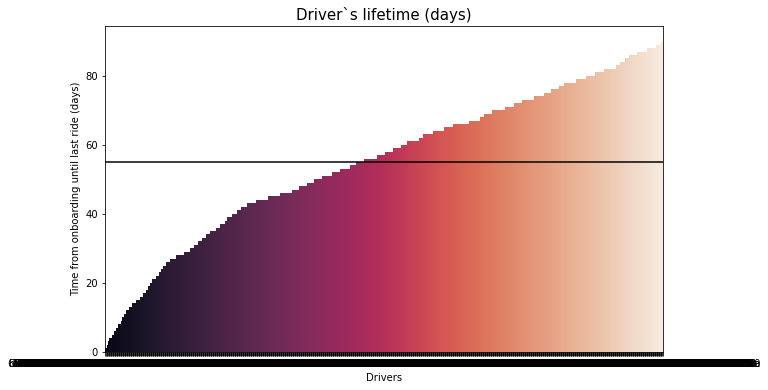

In [123]:
#plot checking for trends

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=last_ride,
                x="driver_id",
                y="time_onboard_to_last_ride",
                order=last_ride.sort_values('time_onboard_to_last_ride').driver_id,
                palette="rocket",
                ax=ax);
ax.axhline (meanline, color="black")
plt.xlabel("Drivers", size=10)
plt.ylabel("Time from onboarding until last ride (days)", size=10)
plt.title("Driver`s lifetime (days)", size=15)

In [124]:
driver_onboarding_df=last_ride[["driver_id","time_onboard_to_last_ride"]]

In [125]:
driver_onboarding_df.head()

,driver_id,time_onboard_to_last_ride
0,002be0ffdc997bd5c50703158b7c2491,86
1,007f0389f9c7b03ef97098422f902e62,85
2,011e5c5dfc5c2c92501b8b24d47509bc,68
3,0152a2f305e71d26cc964f8d4411add9,64
4,01674381af7edd264113d4e6ed55ecda,56


In [126]:
#call driver_frequency_lifetime_df to merge

driver_frequency_lifetime_df.head()

,driver_id,ride_id,lyft_total_revenue_ride$
354,5ccc0e6dc9c7475caf785cdce7b8eb7a,919,3.632313
308,4eb382d1f7d50fae1294964263d1ce82,831,3.531804
509,844e9be5a30d8d9c1f8e9ddb086ff717,821,3.594008
401,689bdf87fb2de49f98bf4946cfaa5068,794,3.383696
217,3788dc9e91f1548816ce8b5af07ddadc,783,3.835977


In [127]:
#check for correlation amount of rides and time staying on board

avg_nr_rides_df=driver_onboarding_df.merge(driver_frequency_lifetime_df, left_on="driver_id", right_on="driver_id")
avg_nr_rides_df.columns=["driver_id","time_onboard_to_last_ride","number_of_rides","lyft_total_revenue_ride$"]
avg_nr_rides_df.head()

,driver_id,time_onboard_to_last_ride,number_of_rides,lyft_total_revenue_ride$
0,002be0ffdc997bd5c50703158b7c2491,86,277,3.528583
1,007f0389f9c7b03ef97098422f902e62,85,31,3.058267
2,011e5c5dfc5c2c92501b8b24d47509bc,68,34,3.824111
3,0152a2f305e71d26cc964f8d4411add9,64,191,3.812694
4,01674381af7edd264113d4e6ed55ecda,56,375,3.974707


In [128]:
#import stats library

import statsmodels.api as sm

In [129]:
#check linear regression

avg_nr_rides_df2=avg_nr_rides_df.copy()

avg_nr_rides_df2=sm.add_constant(avg_nr_rides_df2)
y=avg_nr_rides_df2["time_onboard_to_last_ride"]
X=avg_nr_rides_df2[["const", "number_of_rides","lyft_total_revenue_ride$"]]

reg=sm.OLS(y, X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     time_onboard_to_last_ride   R-squared:                       0.291
Model:                                   OLS   Adj. R-squared:                  0.289
Method:                        Least Squares   F-statistic:                     171.2
Date:                       Sat, 19 Dec 2020   Prob (F-statistic):           5.00e-63
Time:                               20:50:18   Log-Likelihood:                -3619.9
No. Observations:                        837   AIC:                             7246.
Df Residuals:                            834   BIC:                             7260.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       21.6613      5.901      3.671      0.000      10.078      33.245
number_of_rides              0.0661      0.004     18.466      0.000       0.059       0.073
lyft_total_revenue_ride$     5.0892      1.542      3.301      0.001       2.064       8.115
==============================================================================
Omnibus:                       45.326   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.152
Skew:                          -0.051   Prob(JB):                     0.000114
Kurtosis:                       2.286   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
#check how much the ones staying longer earned and how many drives

In [131]:
# merge lifetime_revenue_df and last_ride to know how much the drives staying longer earned in average - scatter plot with average time and earning

In [132]:
# also check correlation here

# 2.3. Churn analysis

In [133]:
#CHANGE
#Explore how drivers churn once they start driving with Lyft. Are there any predictive
#indicators for driver churn?


In [134]:
#check dataframe

avg_nr_rides_df.head()

,driver_id,time_onboard_to_last_ride,number_of_rides,lyft_total_revenue_ride$
0,002be0ffdc997bd5c50703158b7c2491,86,277,3.528583
1,007f0389f9c7b03ef97098422f902e62,85,31,3.058267
2,011e5c5dfc5c2c92501b8b24d47509bc,68,34,3.824111
3,0152a2f305e71d26cc964f8d4411add9,64,191,3.812694
4,01674381af7edd264113d4e6ed55ecda,56,375,3.974707


In [135]:
#check types

avg_nr_rides_df.dtypes

driver_id                     object
time_onboard_to_last_ride      int64
number_of_rides                int64
lyft_total_revenue_ride$     float64
dtype: object

In [136]:
#check number of drivers for the total

length=len(avg_nr_rides_df.index)
length

837

In [137]:
#function to check dataframe

def df_final_drive(days):
    return avg_nr_rides_df.loc[(avg_nr_rides_df["time_onboard_to_last_ride"]<=days)]

df_final_drive(7)

,driver_id,time_onboard_to_last_ride,number_of_rides,lyft_total_revenue_ride$
49,1110d496149d3d8c50276765924df831,7,28,3.392604
71,179ef343f855d34fa0262c720cdb9a52,3,21,3.225773
92,1c95fcac4de21d077072da1ea1705eb5,4,27,3.448461
161,31b451688ffc6f785c22bf74374507bc,4,41,3.644281
197,3b2dca5cc3db92a05ea35056887108b6,5,26,3.506661
221,417055c67f5510da99ac623b02b87847,4,39,3.368844
350,68b546b2f4102641d6774c1ce4f57457,1,22,3.469555
368,6ccc2af7009dfea4572de788827ac5a1,7,31,3.938311
373,6eb2e0f41fc9f1fbb70e7751035fdf87,1,35,3.632302
376,6f660e81330d77df19d4e3fb14b18730,6,44,3.652641


In [138]:
#function to check how many drivers stopped driving after X days

def time_rider(days):
    time_rider_df=avg_nr_rides_df.loc[(avg_nr_rides_df["time_onboard_to_last_ride"]<=days)]
    return len(time_rider_df.index)

In [139]:
time_rider(7)

19

In [140]:
#import library to round

import math

In [141]:
#after 7 days

churn=math.floor((time_rider(7)/length)*100)
print ("churn:", churn, "%")

churn: 2 %


In [142]:
#after 28 days

churn=math.floor((time_rider(28)/length)*100)
print ("churn:", churn, "%")

churn: 14 %


In [143]:
#after 42 days

churn=math.floor((time_rider(42)/length)*100)
print ("churn:", churn, "%")

churn: 25 %


In [144]:
#after 56 days

churn=math.floor((time_rider(56)/length)*100)
print ("churn:", churn, "%")

churn: 48 %


In [145]:
#after 63 days

churn=math.floor((time_rider(63)/length)*100)
print ("churn:", churn, "%")

churn: 58 %


In [146]:
#after 70 days

churn=math.floor((time_rider(70)/length)*100)
print ("churn:", churn, "%")

churn: 71 %


In [147]:
#after 90 days

churn=math.floor((time_rider(90)/length)*100)
print ("churn:", churn, "%")

churn: 100 %


In [148]:
#set conditions looking into the data to look at critical weeks

conditions = [
    (avg_nr_rides_df['time_onboard_to_last_ride'] <= 7),
    ((avg_nr_rides_df['time_onboard_to_last_ride']<= 14)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 21)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 28)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 35)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 42)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 49)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 56)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 63)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 70)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 77)),
    ((avg_nr_rides_df['time_onboard_to_last_ride'] <= 84)),
    (avg_nr_rides_df['time_onboard_to_last_ride'] > 84)
]

choices = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
    '10',
    '11',
    '12',
    '12+'
]

avg_nr_rides_df["number_weeks_leaving"] = np.select(conditions, choices, "error")

In [149]:
#confirm new column

avg_nr_rides_df.head()

,driver_id,time_onboard_to_last_ride,number_of_rides,lyft_total_revenue_ride$,number_weeks_leaving
0,002be0ffdc997bd5c50703158b7c2491,86,277,3.528583,12+
1,007f0389f9c7b03ef97098422f902e62,85,31,3.058267,12+
2,011e5c5dfc5c2c92501b8b24d47509bc,68,34,3.824111,10
3,0152a2f305e71d26cc964f8d4411add9,64,191,3.812694,10
4,01674381af7edd264113d4e6ed55ecda,56,375,3.974707,8


Text(0.5, 1.0, "Drivers' Churn")

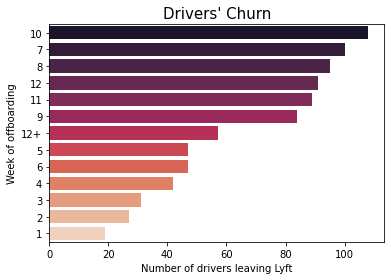

In [150]:
#plot

sns.countplot(data=avg_nr_rides_df,
                y="number_weeks_leaving",
                order=avg_nr_rides_df["number_weeks_leaving"].value_counts().index,
                palette="rocket");

plt.xlabel("Number of drivers leaving Lyft", size=10)
plt.ylabel("Week of offboarding", size=10)
plt.title("Drivers' Churn", size=15)
                
               
            

In [151]:
#check again

avg_nr_rides_df.loc[(avg_nr_rides_df["time_onboard_to_last_ride"]<=7)]

,driver_id,time_onboard_to_last_ride,number_of_rides,lyft_total_revenue_ride$,number_weeks_leaving
49,1110d496149d3d8c50276765924df831,7,28,3.392604,1
71,179ef343f855d34fa0262c720cdb9a52,3,21,3.225773,1
92,1c95fcac4de21d077072da1ea1705eb5,4,27,3.448461,1
161,31b451688ffc6f785c22bf74374507bc,4,41,3.644281,1
197,3b2dca5cc3db92a05ea35056887108b6,5,26,3.506661,1
221,417055c67f5510da99ac623b02b87847,4,39,3.368844,1
350,68b546b2f4102641d6774c1ce4f57457,1,22,3.469555,1
368,6ccc2af7009dfea4572de788827ac5a1,7,31,3.938311,1
373,6eb2e0f41fc9f1fbb70e7751035fdf87,1,35,3.632302,1
376,6f660e81330d77df19d4e3fb14b18730,6,44,3.652641,1


# Analysis driver perspective

# 2.4. Weekday, day and hour analysis

In [152]:
# call df

ridertime.head()

,ride_id,event,timestamp,month,day,weekday,hour
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19,6.0,13.0,0.0,9.0
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51,6.0,13.0,0.0,9.0
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,6.0,13.0,0.0,9.0
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,6.0,13.0,0.0,9.0
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05,6.0,13.0,0.0,10.0


In [153]:
#to count just one ride

time_per_ride_df = ridertime.sort_values('timestamp').groupby(['ride_id'], as_index=False).last()

In [154]:
#merge to have it with revenue and time

time_driver_ride_df=lifetime_revenue_df.merge(time_per_ride_df, left_on="ride_id", right_on="ride_id")

In [155]:
#check all info

time_driver_ride_df.head()

,driver_id,ride_id,ride_primetime_min,base_fare$,distance_ride_revenue$,duration_ride_revenue$,service_fee$,cost_waiting_time$,final_driver_revenue_before_commission$,lyft_20_revenue,lyft_20_revenue_min,lyft_20_revenue_final,lyft_total_revenue_ride$,event,timestamp,month,day,weekday,hour
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,0.833333,2,1.294099,1.199000,1.75,0.0,4.493099,0.898620,0.493099,0.493099,2.243099,dropped_off_at,2016-04-23 02:22:07,4.0,23.0,5.0,2.0
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,0.000000,2,2.402407,2.966333,1.75,0.0,7.368741,1.473748,1.473748,1.473748,3.223748,dropped_off_at,2016-03-29 19:17:30,3.0,29.0,1.0,19.0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,0.000000,2,2.345241,2.097333,1.75,0.0,6.442575,1.288515,1.288515,1.288515,3.038515,dropped_off_at,2016-06-21 12:11:07,6.0,21.0,1.0,12.0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,0.416667,2,46.649722,12.239333,1.75,0.0,60.889055,12.177811,12.177811,12.177811,13.927811,dropped_off_at,2016-05-19 10:13:58,5.0,19.0,3.0,10.0
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,1.666667,2,2.940484,3.017667,1.75,0.0,7.958150,1.591630,1.591630,1.591630,3.341630,dropped_off_at,2016-04-20 22:20:45,4.0,20.0,2.0,22.0


In [156]:
# analyse weekday and time

weekday_time_df=time_driver_ride_df.groupby(["driver_id","weekday","hour"], as_index = False).agg({"ride_id":"count"}).sort_values(by="ride_id", ascending=False)



In [157]:
weekday_time_df.head(10)

,driver_id,weekday,hour,ride_id
41751,cf27028c2fe4a9fe00795d0d4dd23a18,5.0,22.0,27
21593,689bdf87fb2de49f98bf4946cfaa5068,5.0,1.0,24
16006,4eb382d1f7d50fae1294964263d1ce82,5.0,2.0,24
4613,19e1cdfeaf90239d8585e6a78136a403,5.0,20.0,24
40578,c8f03786f7e1b205a9d38722fc3651e6,6.0,2.0,24
26148,7c27405cefee2fad79a81a819ca9dbe1,5.0,22.0,23
18946,5cff9e4588a1d8b4b0fd703c4720421b,1.0,10.0,23
41708,cf27028c2fe4a9fe00795d0d4dd23a18,2.0,23.0,23
4607,19e1cdfeaf90239d8585e6a78136a403,5.0,1.0,23
29003,8bda575d26a589024a4e62aeba352f93,2.0,12.0,22


In [158]:
# further analyse weekday and time

weekday_time_df2=time_driver_ride_df.groupby(["weekday","hour"], as_index = False).agg({"ride_id":"count"}).sort_values(by="ride_id", ascending=False)

weekday_time_df2["hour"]=weekday_time_df2["hour"].astype("int")
#weekday_time_df2["weekday"]=weekday_time_df2["weekday"].astype("int")
weekday_time_df2["weekday"]=weekday_time_df2["weekday"].replace([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"])

weekday_time_df2.head(10)




,weekday,hour,ride_id
115,Friday,19,2597
142,Saturday,22,2570
143,Saturday,23,2524
118,Friday,22,2407
114,Friday,18,2373
91,Thursday,19,2324
119,Friday,23,2315
117,Friday,21,2293
116,Friday,20,2293
139,Saturday,19,2256


Text(0.5, 1.0, 'Number of  Rides per Weekday and Hour')

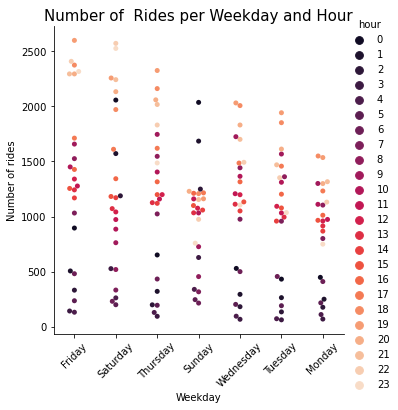

In [165]:
#plot checking for trends


g=sns.catplot(data=weekday_time_df2,
                x="weekday",
                y="ride_id",
                hue="hour",
                kind="swarm",
                palette="rocket");
g.set_xticklabels(rotation=45)
plt.xlabel("Weekday", size=10)
plt.ylabel("Number of rides", size=10)
plt.title("Number of  Rides per Weekday and Hour", size=15)

In [166]:
#does it pay off for the driver?

weekday_time_df3=time_driver_ride_df.groupby(["weekday","hour"], as_index = False).agg({"ride_id":"count","final_driver_revenue_before_commission$":"mean"}).sort_values(by="final_driver_revenue_before_commission$", ascending=False)

weekday_time_df3.head(10)

,weekday,hour,ride_id,final_driver_revenue_before_commission$
100,4.0,4.0,133,15.925799
149,6.0,5.0,247,15.588010
77,3.0,5.0,196,15.496034
125,5.0,5.0,201,15.349295
76,3.0,4.0,131,15.235039
150,6.0,6.0,216,15.205576
4,0.0,4.0,112,14.594357
28,1.0,4.0,74,14.414425
75,3.0,3.0,96,14.284230
5,0.0,5.0,218,13.934856


In [167]:
# does it pay off for lyft?


weekday_time_df4=time_driver_ride_df.groupby(["weekday","hour"], as_index = False).agg({"ride_id":"count","lyft_total_revenue_ride$":"mean"}).sort_values(by="lyft_total_revenue_ride$", ascending=False)

weekday_time_df4.head(10)

,weekday,hour,ride_id,lyft_total_revenue_ride$
100,4.0,4.0,133,4.877630
149,6.0,5.0,247,4.791292
77,3.0,5.0,196,4.778558
76,3.0,4.0,131,4.728486
150,6.0,6.0,216,4.705135
125,5.0,5.0,201,4.704889
4,0.0,4.0,112,4.609571
28,1.0,4.0,74,4.569011
75,3.0,3.0,96,4.483035
5,0.0,5.0,218,4.467148


In [169]:
#checking predictive total revenues at a certain time

weekday_rev_df=weekday_time_df4.copy()

weekday_rev_df["hour"]=weekday_rev_df["hour"].astype("int")
weekday_rev_df["weekday"]=weekday_rev_df["weekday"].replace([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"])
weekday_rev_df["total_predicted_revenue"]=weekday_rev_df["ride_id"]*weekday_rev_df["lyft_total_revenue_ride$"]
weekday_rev_df.sort_values(by="total_predicted_revenue", ascending=False)


,weekday,hour,ride_id,lyft_total_revenue_ride$,total_predicted_revenue
115,Friday,19,2597,3.476565,9028.638537
143,Saturday,23,2524,3.559186,8983.385724
142,Saturday,22,2570,3.460368,8893.146713
118,Friday,22,2407,3.614093,8699.121640
114,Friday,18,2373,3.643000,8644.838831
...,...,...,...,...,...
52,Wednesday,4,97,4.225843,409.906764
28,Tuesday,4,74,4.569011,338.106820
51,Wednesday,3,69,4.279982,295.318771
3,Monday,3,71,4.002280,284.161904


In [ ]:
#plot checking for trends


g=sns.catplot(data=weekday_time_df2,
                x="weekday",
                y="ride_id",
                hue="hour",
                kind="swarm",
                palette="rocket");
g.set_xticklabels(rotation=45)
plt.xlabel("Weekday", size=10)
plt.ylabel("Number of rides", size=10)
plt.title("Number of  Rides per Weekday and Hour", size=15)

In [ ]:
# further analyses with day and time, check if some holiday influenced it

weekday_time_df5=time_driver_ride_df.groupby(["month","day","hour"], as_index = False).agg({"ride_id":"count"}).sort_values(by="ride_id", ascending=False)

weekday_time_df5.head(10)

In [ ]:
#check holiday influence again

weekday_time_df6=time_driver_ride_df.groupby(["month","day"], as_index = False).agg({"ride_id":"count"}).sort_values(by="ride_id", ascending=False)

weekday_time_df6.head(10)

In [ ]:
# ride prime time ride_primetime_min. check better

weekday_time_df7=time_driver_ride_df.groupby(["weekday","hour"], as_index = False).agg({"ride_primetime_min":"sum"}).sort_values(by="ride_primetime_min", ascending=False)

weekday_time_df7.head(10)

In [ ]:
#scatter plot prime time and revenue of the driver

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=time_driver_ride_df,
                x="final_driver_revenue_before_commission$",
                y="ride_primetime_min",
                ax=ax);

In [ ]:
#scatter plot prime time and amount of time in the business?



In [ ]:
#CONNECT PRIME TIME WITH DAY AND TIME IN THE AREA FOR ALLERTS 

In [ ]:
#time_per_ride_df2 = time_per_ride_df.groupby(['driver_id'], as_index = False).agg({ 'ride_id':'count','lyft_total_revenue_ride$': 'mean'}).sort_values(by='lyft_total_revenue_ride$', ascending = False)